In [26]:
from pytket.circuit import Circuit, fresh_symbol
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.quantinuum import QuantinuumBackend
# %matplotlib qt5
import matplotlib.pyplot as pl
import pytket

import os
print(os.getcwd())

from pytket.extensions.qiskit import qiskit_to_tk, AerBackend
from pytket.backends.backendresult import BackendResult

import qiskit as qk

import pickle
import pandas as pd
import numpy as np

/Users/utkarshagrawal/Documents/Postdoc/U_1_exp/Quantinum/Weak measurements


In [29]:
machine = 'H1-1E'
backend = QuantinuumBackend(machine)
# backend.login()

print(machine, "status:", backend.device_state(device_name=machine))

H1-1E status: online


In [30]:
## Load compiled circuits
filename = 'data/compiled_circuits_multiple_ancillas' 
with open(filename,'rb') as f:
    compiled_circuits = pickle.load(f)

In [31]:
[L for (L,depth,p,Q) in compiled_circuits]

[14,
 10,
 16,
 8,
 14,
 8,
 10,
 10,
 12,
 8,
 10,
 12,
 12,
 10,
 8,
 14,
 14,
 14,
 10,
 14,
 8,
 14,
 10,
 10,
 8,
 10,
 14,
 14,
 12,
 10,
 10,
 16,
 8,
 14,
 14,
 14,
 10,
 12,
 12,
 12,
 10,
 14,
 6,
 12,
 12,
 14,
 14,
 8,
 10,
 12,
 14,
 10,
 8,
 14,
 14,
 12,
 12,
 12,
 12,
 10,
 10,
 14,
 10,
 12,
 8,
 10,
 10,
 14,
 8,
 6,
 10,
 8,
 14,
 14,
 8,
 16,
 16,
 14,
 10,
 6,
 8,
 8,
 10,
 14,
 10,
 8,
 12,
 14,
 10,
 10,
 16,
 10,
 14,
 12,
 14,
 8,
 16,
 12,
 14,
 6,
 6,
 8,
 12,
 6,
 6,
 6,
 6,
 16,
 6,
 6,
 16,
 6,
 16,
 8,
 6,
 12,
 6,
 8,
 16,
 6,
 12,
 6,
 16,
 8,
 16,
 8,
 16,
 16,
 6,
 16,
 12,
 8,
 6,
 16,
 16,
 10,
 12,
 8,
 12,
 8,
 8,
 6,
 12,
 12,
 16,
 16,
 8,
 16,
 8,
 8,
 6,
 12,
 12,
 16,
 14,
 6,
 16,
 16,
 14,
 6,
 6,
 16,
 16,
 16,
 6,
 10,
 12,
 16,
 6,
 10,
 8,
 6,
 12,
 16,
 6,
 6,
 6,
 16,
 6,
 16]

In [35]:
n_shots = 200
# p_list = [0.571,0.624,0.677,0.73,0.783][:]
p_list = [0.412,0.518,0.624,0.73,0.836]
L_list = [8,12,16][-1:]
L_list = [6]

def run_emulator():
    previous_results = load_result_dict(batch_number=6)
    count = 0
    handle_dict = {}
    for param,circ in compiled_circuits.items():
        L,depth,p,Q = param
        if L not in L_list:
            continue
        if p not in p_list:
            continue
        if param in previous_results:
            continue
        if count == 0:
            first_batch = backend.process_circuit(circuit=circ, n_shots=n_shots)
            handle_dict[param] = first_batch
        else:
            new_batch = backend.process_circuit(circuit=circ, n_shots=n_shots)
            handle_dict[param] = new_batch
        count += 1
    return handle_dict


In [36]:
handle_dict = run_emulator()

In [37]:
handle_dict

{(6, 6, 0.836, 2): ResultHandle('6c01933f33cd4cf68c2991eae1074ccd', 'null'),
 (6, 6, 0.518, 2): ResultHandle('b8ce6a02cf524bb4a46f5a9f042092ab', 'null'),
 (6, 6, 0.412, 3): ResultHandle('43c0cad42e9c4884b397736083ee4b2a', 'null'),
 (6, 6, 0.624, 3): ResultHandle('f63d617646ab4176a4e6305a7a80de31', 'null'),
 (6, 6, 0.412, 2): ResultHandle('0c2deb36e83f4ee086d542da2c1ca3a6', 'null'),
 (6, 6, 0.518, 3): ResultHandle('42f78389c5c24dd39262c3170deba1db', 'null'),
 (6, 6, 0.836, 3): ResultHandle('f5fe7f37ecbb4c07aeb43cb8581cf615', 'null')}

In [39]:
[(param,backend.circuit_status(handle)) for param,handle in handle_dict.items()]

[((6, 6, 0.836, 2),
  CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-29615", "submit-date": "2023-04-12T19:11:32.629230", "result-date": "2023-04-12T19:20:04.192850", "queue-position": null, "cost": "61.32", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None)),
 ((6, 6, 0.518, 2),
  CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-15443", "submit-date": "2023-04-12T19:11:33.289325", "result-date": "2023-04-12T19:20:38.552880", "queue-position": null, "cost": "60.84", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None)),
 ((6, 6, 0.412, 3),
  CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Re

In [43]:
# Saving and loading handle dictionary

def save_handle_dict(handle_dict):
    file_dir = 'data/emulator_data/emulator_handle/'
    temp = len(os.listdir(file_dir))
    file_dir = file_dir + str(temp+1) +'/'
    if not os.path.isdir(file_dir):
        os.makedirs(file_dir)
    with open(file_dir + 'handle_dict','wb') as f:
        pickle.dump(handle_dict,f)

    df = pd.DataFrame()
    df['L'] = []
    df['shots'] = []
    df['p'] = []
    df['Q'] = []
    display(df)

    number_of_p = len(p_list)
    for param in handle_dict:
        L,depth,p,Q = param
        # if Q!= L//2:
        #     continue
        temp = pd.DataFrame({'L':[L],'p':[p],'shots':[n_shots],'Q':Q})
        df = pd.concat([df,temp],ignore_index=True)

    display(df)
    df.to_csv(file_dir+'information.csv')

def load_handle_dict(batch_number):
    file_loc = 'data/emulator_data/emulator_handle/'+str(batch_number)+'/handle_dict'
    with open(file_loc,'rb') as f:
        handle_dict = pickle.load(f)
    return handle_dict


In [44]:
save_handle_dict(handle_dict)

Empty DataFrame
Columns: [L, shots, p, Q]
Index: []

L  shots      p    Q
0  6.0  200.0  0.836  2.0
1  6.0  200.0  0.518  2.0
2  6.0  200.0  0.412  3.0
3  6.0  200.0  0.624  3.0
4  6.0  200.0  0.412  2.0
5  6.0  200.0  0.518  3.0
6  6.0  200.0  0.836  3.0

In [48]:
handle_dict_copy = handle_dict.copy()

In [50]:
[backend.circuit_status(handle) for handle in handle_dict.values()]

[CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-145386", "submit-date": "2023-03-10T21:25:35.476562", "result-date": "2023-03-10T21:27:42.882587", "queue-position": null, "cost": "162.32", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None),
 CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-133062", "submit-date": "2023-03-10T21:25:35.926248", "result-date": "2023-03-10T21:27:45.686742", "queue-position": null, "cost": "162.08", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None),
 CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-170034", "subm

In [45]:
# getting results from completed jobs
def get_result(handle_dic):
    result_dict = {}
    for param, handle in handle_dic.items():
        try:
            result_dict[param] = backend.get_result(handle).to_dict()
        except:
            print('no result for ',param)
    return result_dict

def save_result_dict(result_dict,batch_number):
    file_dir = 'data/emulator_data/emulator_handle/'+str(batch_number) +'/'
    file_loc = file_dir + 'result'
    with open(file_loc,'wb') as f:
        pickle.dump(result_dict,f)

def load_result_dict(batch_number):

    file_dir = 'data/emulator_data/emulator_handle/'+str(batch_number)+'/'
    if 'result' not in os.listdir(file_dir):
        handle_dict = load_handle_dict(batch_number)
        result_dict = get_result(handle_dict)
        save_result_dict(result_dict,batch_number)
    else:
        with open(file_dir+'result','rb') as f:
            result_dict = pickle.load(f)
    return result_dict


In [46]:
batch_number = 7
result_dict = load_result_dict(batch_number)

In [47]:
print(result_dict.keys())

dict_keys([(6, 6, 0.836, 2), (6, 6, 0.518, 2), (6, 6, 0.412, 3), (6, 6, 0.624, 3), (6, 6, 0.412, 2), (6, 6, 0.518, 3), (6, 6, 0.836, 3)])


In [10]:
aa = [pytket.Bit('') for i in range(4)]

In [11]:
L = 16
depth = 16
c_bits = [pytket.Bit('') for _ in range(L*depth)]
for i in range(L*depth):
    x = i%L
    t = i//L
    temp = ['c'+str(t),[x]]
    c_bits[i] = c_bits[i].from_list(temp)

In [60]:
result = BackendResult.from_dict(result_dict[((16, 16, 0.73, 8))])
temp = result.get_counts(cbits=c_bits)

KeyError: (16, 16, 0.73, 8)

In [13]:

for data,N in temp.items():
    data = np.array(data,dtype=int).reshape((depth,L))
    # data = 2*data - 1
    print(data)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1]
 [1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 1 0 0

In [14]:
count

NameError: name 'count' is not defined

In [48]:
## Get outcome data (to be given as input to the decoder code) from the quantinuum emulator results

def outcome_from_results(result,L,depth):
    # bitlist = result.get_bitlist()
    def get_bitlist():
        c_bits = [pytket.Bit('') for _ in range(L*depth)]
        for i in range(L*depth):
            x = i%L
            t = i//L
            temp = ['c'+str(t),[x]]
            c_bits[i] = c_bits[i].from_list(temp)
        return c_bits

    bitlist = get_bitlist()
    measurement_dic = result.get_counts(cbits=bitlist)
    # measurement_dic = {measurements in a shot:number of occurances}

    outcome_list = []

    for data,N in measurement_dic.items(): # data is measurement outcomes in one shot
        # data = list(reversed(data)) 
        # we are reversing the data because quantinuum backend gives result in decending order of time. Whereas the sep_decoder takes input in ascending order
        data = np.array(data,dtype=int).reshape((depth,L))
        data = 2*data - 1
        outcome_list.append((data,N))

    return outcome_list


def get_outcomes(batch_number):
    file_dir = 'data/emulator_data/emulator_handle/'+str(batch_number)+'/'

    # if 'outcomes_generated' in os.listdir(file_dir):
        # return ## outcomes were already generated for this batch

    noisy_label = '_noisy'
    outcome_filedir = 'data/emulator_data/measurement_data_all_qubits' + noisy_label 

    for param, result in result_dict.items():
        print(param)
        result = BackendResult.from_dict(result)
        L,depth,p,Q = param

        ## defining output file name
        if int(depth/L) == 1:
            depth_label = ''
        else:
            depth_label = "_depth_ratio="+str(int(depth/L))
        
        outcome_filedir = outcome_filedir + depth_label + '/'
        if not os.path.isdir(outcome_filedir):
            os.makedirs(outcome_filedir)
        
        outcome_file = outcome_filedir + '/L='+str(L)+'_depth='+str(depth)+'_Q='+str(Q)+'_p=' + str(p)+ '_seed='+str(1)
        ########

        if os.path.isfile(outcome_file):
            with open(outcome_file,'rb') as f:
                outcomes = pickle.load(f)
        else:
            outcomes = []

        outcomes = []
        new_outcomes = outcome_from_results(result,L,depth)
        outcomes.extend(new_outcomes)

        with open(outcome_file,'wb') as f:
            pickle.dump(outcomes,f)

    with open(file_dir+'outcomes_generated','wb') as f:
        pickle.dump("",f)


In [49]:
get_outcomes(batch_number=7)

(6, 6, 0.836, 2)
(6, 6, 0.518, 2)
(6, 6, 0.412, 3)
(6, 6, 0.624, 3)
(6, 6, 0.412, 2)
(6, 6, 0.518, 3)
(6, 6, 0.836, 3)


## Running the decoder

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import sep_decoder_2 
%reload_ext sep_decoder_2

In [77]:
final_direc = 'data/emulator_data/emulator_sep_data/'
outcome_direc = 'data/emulator_data/measurement_data_all_qubits_noisy'
L_list = [6,8,10,12]
# p_list = [0.571,0.624,0.677,0.73,0.783]
p_list = [0.412,0.518,0.624,0.73,0.836]
for decoding_protocol in [0,1,2,3][1:]:
    sep_decoder_2.collect_sep_data(L_list=L_list,p_list=p_list,decoding_protocol=decoding_protocol,depth_ratio=1,
is_noisy=True, final_direc=final_direc,outcomes_filedir=outcome_direc,half_depth=False)

6 0.412 3  frac of faulty traj: 0.0  time= 0.11615681648254395
6 0.412 2  frac of faulty traj: 0.0  time= 0.09989690780639648
6 0.518 3  frac of faulty traj: 0.005  time= 0.11303281784057617
6 0.518 2  frac of faulty traj: 0.01  time= 0.11389803886413574
6 0.624 3  frac of faulty traj: 0.0  time= 0.09923791885375977
6 0.624 2  frac of faulty traj: 0.045  time= 0.11511111259460449
6 0.73 3  frac of faulty traj: 0.005  time= 0.08884119987487793
6 0.73 2  frac of faulty traj: 0.075  time= 0.11493086814880371
6 0.836 3  frac of faulty traj: 0.0  time= 0.07059097290039062
6 0.836 2  frac of faulty traj: 0.09  time= 0.11216402053833008
8 0.412 4  frac of faulty traj: 0.0  time= 0.24169611930847168
8 0.412 3  frac of faulty traj: 0.01  time= 0.26044297218322754
8 0.518 4  frac of faulty traj: 0.0  time= 0.23395609855651855
8 0.518 3  frac of faulty traj: 0.035  time= 0.24721598625183105
8 0.624 4  frac of faulty traj: 0.02  time= 0.219940185546875
8 0.624 3  frac of faulty traj: 0.05  time= 0

## Analyzing the results

In [78]:
def load_data(filename):

    with open(filename,'rb') as f:
        data = pickle.load(f)

    return data

In [79]:
def load_data(filename):

    with open(filename,'rb') as f:
        data = pickle.load(f)

    return data

def plot_success_prob(data,L_list,charge_fac = 0,N_samples=-1,marker='o',ls='-',post_label = '',color_list = [],ms=6):
    ent = {}
    err = {}
    for i,L in enumerate(L_list[:]):
        ent[L] = []
        err[L] = []
        p_list = list(data[L].keys())
        # p_list = [0.412,0.518,0.624,0.73,0.836]

        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            temp = tempQ + tempQ2
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))
           
            ent[L].append(np.average(np.array(temp)))
            err[L].append(np.std(temp)/(len(temp)-1)**0.5)
        if not color_list:
            pl.errorbar(np.array(p_list)/(np.pi/2),ent[L],yerr=err[L],ms=ms,ls=ls,marker=marker,label='L='+str(L)+post_label)
        else:
            pl.errorbar(np.array(p_list)/(np.pi/2),ent[L],yerr=err[L],ms=ms,color=color_list[i],ls=ls,marker=marker,label='L='+str(L)+post_label)

    pl.xlabel(r'$\gamma$',fontsize=16)
    # pl.ylabel(r'$\langle p \rangle_{suc}$',fontsize=16)
    pl.ylabel(r'Success prob',fontsize=16)

    pl.legend(fontsize=16)
    pl.tight_layout()

def plot_success_ent(data,L_list,charge_fac = 0,N_samples=-1,marker='o'):
    ent = {}
    err = {}
    for L in L_list[:]:
        ent[L] = []
        err[L] = []
        p_list = list(data[L].keys())
        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            temp = tempQ + tempQ2
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))
            # ent.append(np.sum(np.array(suc_list)>0.5)/len(suc_list))
            ent_list = np.array([(-x*np.log(x) - (1-x)*np.log(1-x)) if 0<x<1 else 0 for x in tempQ2+tempQ])
            ent[L].append(np.average(ent_list))
            err[L].append(np.std(ent_list)/(len(temp)-1)**0.5)

        pl.errorbar(np.array(p_list),ent[L],yerr=err[L],ls='-',marker=marker,label='L='+str(L))

    pl.xlabel(r'$\gamma$',fontsize=16)
    # pl.ylabel(r'$\langle p \rangle_{suc}$',fontsize=16)
    pl.ylabel(r'Success entropy',fontsize=16)

    pl.legend(fontsize=16)
    pl.tight_layout()

def plot_success_binder(data,L_list,N_samples=-1,marker='o',color=None,ls='-',extra_label=''):
    binder = {}
    err = {}
    for L in L_list[:]:
        binder[L] = []
        err[L] = []
        p_list = np.array(list(data[L].keys()))
        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))
            ent_list = np.array([(-x*np.log(x) - (1-x)*np.log(1-x)) if 0<x<1 else 0 for x in tempQ2+tempQ])
            mu_1 = np.average(ent_list)
            mu_4 = np.average((ent_list-mu_1)**4)
            e_4 = np.std(ent_list**4)/len(tempQ+tempQ2)
            mu_2 = np.average((ent_list-mu_1)**2)
            e_2 = 2*mu_2*np.std(ent_list**2)/len(tempQ+tempQ2)
            binder[L].append(1-mu_4/(3*mu_2**2))
        
        if color is None:
            pl.plot(p_list,binder[L],ls=ls,marker=marker,label='L='+str(L)+extra_label)
        else:
            pl.plot(p_list,binder[L],ls=ls,marker=marker,label='L='+str(L)+extra_label,color=color)

    pl.xlabel(r'$\gamma$',fontsize=16)
    pl.ylabel(r'Binder${}_{suc}$',fontsize=16)
    pl.legend(fontsize=16)
    pl.tight_layout()


def plot_success_variance(data,L_list,N_samples=-1,marker='o',color=None,ls='-',extra_label=''):
    binder = {}
    err = {}
    for L in L_list[:]:
        binder[L] = []
        err[L] = []
        p_list = np.array(list(data[L].keys()))
        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))

            ent_list = np.array([(-x*np.log(x) - (1-x)*np.log(1-x)) if 0<x<1 else 0 for x in tempQ2+tempQ])

            mu_1 = np.average(ent_list)
            
            mu_2 = np.average((ent_list-mu_1)**2)
            
            binder[L].append(mu_2)
        
        if color is None:
            pl.plot(p_list,binder[L],ls=ls,marker=marker,label='L='+str(L)+extra_label)
        else:
            pl.plot(p_list,binder[L],ls=ls,marker=marker,label='L='+str(L)+extra_label,color=color)

    pl.xlabel(r'$\gamma$',fontsize=16)
    pl.ylabel(r'Binder${}_{suc}$',fontsize=16)
    pl.legend(fontsize=16)
    pl.tight_layout()


In [80]:
import matplotlib.pyplot as pl
import pickle
import numpy as np

dict_keys([6, 8, 10, 12])
L= 6 p= 0.412 data_size: 199 199
L= 6 p= 0.518 data_size: 198 199
L= 6 p= 0.624 data_size: 199 199
L= 6 p= 0.73 data_size: 198 198
L= 6 p= 0.836 data_size: 199 199
L= 8 p= 0.412 data_size: 199 199
L= 8 p= 0.518 data_size: 199 199
L= 8 p= 0.624 data_size: 195 199
L= 8 p= 0.73 data_size: 197 198
L= 8 p= 0.836 data_size: 196 197
L= 10 p= 0.412 data_size: 199 199
L= 10 p= 0.518 data_size: 199 199
L= 10 p= 0.624 data_size: 196 199
L= 10 p= 0.73 data_size: 190 199
L= 10 p= 0.836 data_size: 194 197
L= 12 p= 0.412 data_size: 199 199
L= 12 p= 0.518 data_size: 198 199
L= 12 p= 0.624 data_size: 192 199
L= 12 p= 0.73 data_size: 187 195
L= 12 p= 0.836 data_size: 183 199
184
L= 6 p= 0.2 data_size: 184 184
L= 6 p= 0.253 data_size: 184 184
L= 6 p= 0.306 data_size: 184 184
L= 6 p= 0.359 data_size: 184 184
L= 6 p= 0.412 data_size: 184 184
L= 6 p= 0.465 data_size: 184 184
L= 6 p= 0.518 data_size: 184 184
L= 6 p= 0.571 data_size: 184 184
L= 6 p= 0.624 data_size: 184 184
L= 6 p= 0

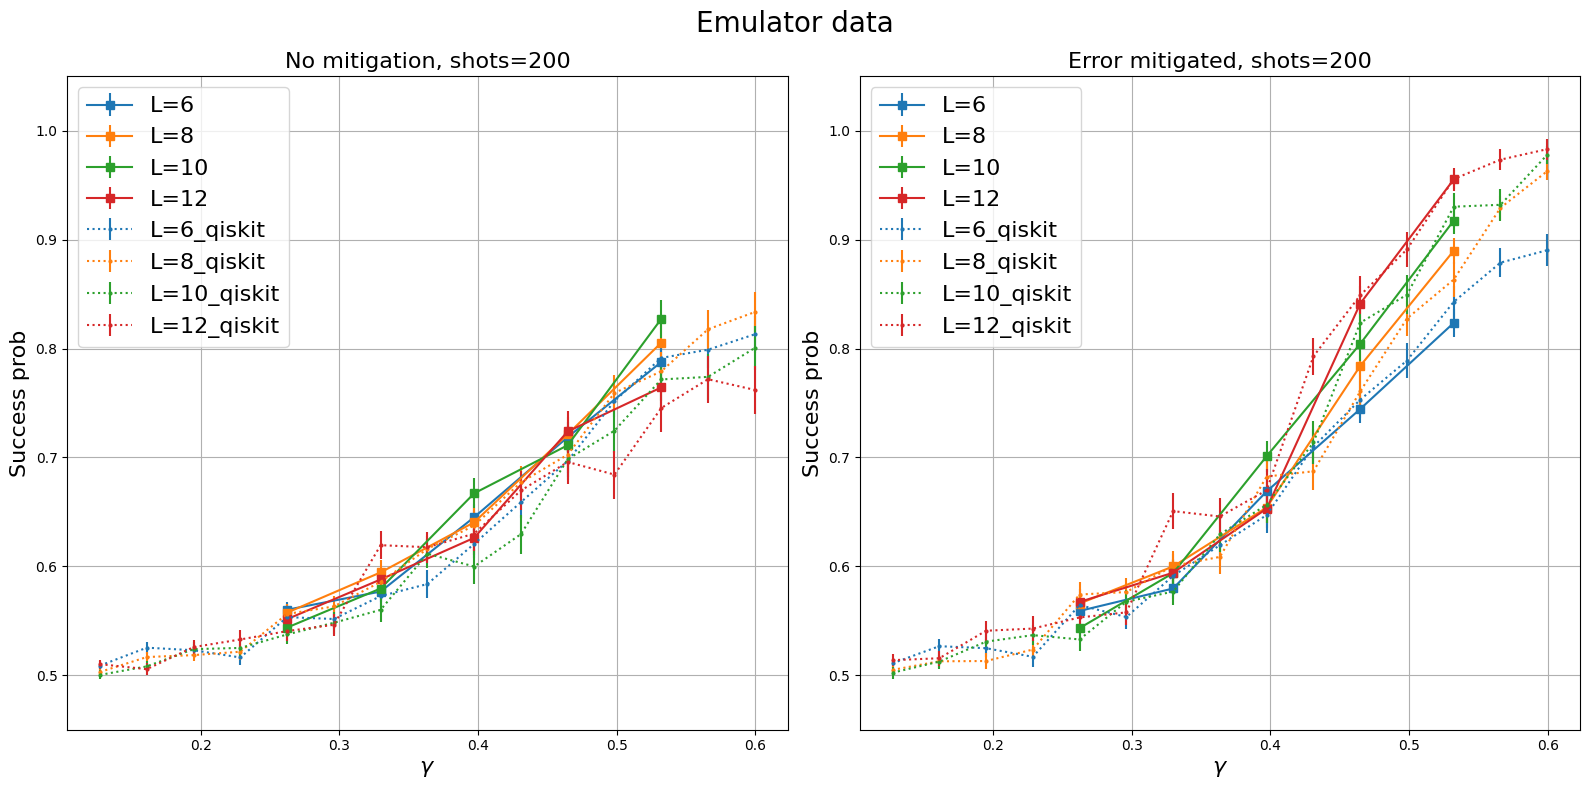

In [87]:
# %matplotlib qt
pl.figure(1,figsize=(16,8))
pl.suptitle('Emulator data',fontsize=20)
L_list = [6,8,10,12,16][:-1]

file = 'data/emulator_data/emulator_sep_data/seed=1_all_qubits_decoding_protocol='
prop_cycle = pl.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:]

protocols = [0,3]

for i,decoding_protocol in enumerate(protocols):
    pl.subplot(1,2,i+1)
    is_noisy = '_noisy'

    if decoding_protocol == 0:
        decoding_label = 'No mitigation'
    elif decoding_protocol == 3:
        decoding_label = 'Error mitigated'

    data=load_data(file+str(decoding_protocol)+is_noisy)
    data2=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_decoding_protocol='+str(decoding_protocol)+is_noisy)
    print(data.keys())
    N_samples = -1
    plot_success_prob(data,L_list,charge_fac=0,marker='s',N_samples=N_samples,color_list=colors)
    N_samples = len(data[12][0.836][12//2])
    print(N_samples)
    plot_success_prob(data2,L_list,charge_fac=0,marker='o',ls=':',N_samples=N_samples,post_label='_qiskit',color_list=colors,ms=2)

    # plot_success_binder(data,L_list,marker='s',N_samples=-1)
    # pl.title('SEP decoder. Noisy. Decoding_protocol = {}, shots = {}'.format(decoding_protocol,N_samples),fontsize=16)
    pl.title(decoding_label+', shots=200',fontsize=16)
    pl.tight_layout()
    pl.grid(which='both')
    pl.ylim(0.45,1.05)

# decoding_protocol = 0
# is_noisy = '_noisy'
# data=load_data(file+str(decoding_protocol)+is_noisy)
# data2=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_decoding_protocol='+str(decoding_protocol)+is_noisy)
# print(data.keys())
# plot_success_prob(data,L_list,charge_fac=0,marker='s',N_samples=N_samples)
# plot_success_prob(data2,L_list,charge_fac=0,marker='o',ls=':',N_samples=N_samples)

# # plot_success_binder(data,L_list,marker='s',N_samples=-1)
# pl.title('SEP decoder. Noisy. Decoding_protocol = {}, shots = {}'.format(decoding_protocol,N_samples),fontsize=16)
# pl.tight_layout()
# # pl.xlim(0.3,0.5)
# # pl.ylim(-2,1)

# pl.subplot(2,2,2)
# decoding_protocol = 1
# is_noisy = '_noisy'
# data=load_data(file+str(decoding_protocol)+is_noisy)
# data2=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_decoding_protocol='+str(decoding_protocol)+is_noisy)

# plot_success_prob(data,L_list,charge_fac=0,marker='s',N_samples=N_samples)
# plot_success_prob(data2,L_list,charge_fac=0,marker='s',N_samples=N_samples)

# # plot_success_binder(data,L_list,marker='s',N_samples=-1)
# pl.title('SEP decoder. Noisy. Decoding_protocol = {}, shots = {}'.format(decoding_protocol,N_samples),fontsize=16)
# pl.tight_layout()
# # pl.xlim(0.3,0.5)
# # pl.ylim(-2,1)

# pl.subplot(2,2,3)
# # pl.ylim(0,np.log(2))
# decoding_protocol = 2
# is_noisy = '_noisy'
# data=load_data(file+str(decoding_protocol)+is_noisy)
# data2=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_decoding_protocol='+str(decoding_protocol)+is_noisy)

# plot_success_prob(data,L_list,charge_fac=0,marker='s',N_samples=N_samples)
# plot_success_prob(data2,L_list,charge_fac=0,marker='s',N_samples=N_samples)

# # plot_success_binder(data,L_list,marker='s',N_samples=-1)
# pl.title('SEP decoder. Noisy. Decoding_protocol = {}, shots = {}'.format(decoding_protocol,N_samples),fontsize=16)
# pl.tight_layout()
# # pl.xlim(0.3,0.5)
# # pl.ylim(-2,1)

# pl.subplot(2,2,4)
# # pl.ylim(0,np.log(2))
# decoding_protocol = 3
# is_noisy = '_noisy'
# data=load_data(file+str(decoding_protocol)+is_noisy)
# data2=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_decoding_protocol='+str(decoding_protocol)+is_noisy)

# plot_success_prob(data,L_list,charge_fac=0,marker='s',N_samples=N_samples)
# plot_success_prob(data2,L_list,charge_fac=0,marker='s',N_samples=N_samples)

# # plot_success_binder(data,L_list,marker='s',N_samples=-1)
# pl.title('SEP decoder. Noisy, Decoding_protocol = {}, shots = {}'.format(decoding_protocol,N_samples),fontsize=16)
# pl.tight_layout()
# # pl.xlim(0.3,0.5)


L= 8 p= 0.412 data_size: 192 188
L= 8 p= 0.518 data_size: 191 180
L= 8 p= 0.624 data_size: 192 172
L= 8 p= 0.73 data_size: 196 159
L= 8 p= 0.836 data_size: 195 155
L= 12 p= 0.412 data_size: 182 169
L= 12 p= 0.518 data_size: 185 170
L= 12 p= 0.624 data_size: 185 144
L= 12 p= 0.73 data_size: 184 129
L= 12 p= 0.836 data_size: 183 121
L= 16 p= 0.412 data_size: 158 142
L= 16 p= 0.518 data_size: 174 145
L= 16 p= 0.624 data_size: 182 123
L= 16 p= 0.73 data_size: 184 93
L= 16 p= 0.836 data_size: 187 92


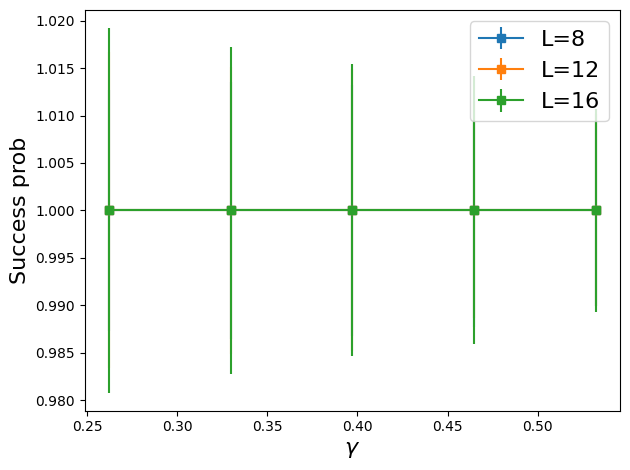

In [15]:
prop_cycle = pl.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

pl.figure(1)


data=load_data('data/emulator_data/emulator_sep_data_constant_depth/seed=1_all_qubits_noisy')
L_list = [8,12,16][:]
# plot_success_prob(data,L_list,marker='s',N_samples=-1)
# plot_success_binder(data,L_list,marker='s',N_samples=-1,ls='-', extra_label='_noisy_emulator')



data=load_data('data/emulator_data/emulator_sep_data/seed=1_all_qubits_noisy')
L_list = [8,12,16][:]
plot_success_prob(data,L_list,marker='s',N_samples=-1)
# plot_success_binder(data,L_list,marker='s',N_samples=-1,ls='-', extra_label='_noisy_emulator')
# pl.yscale('log')